In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
BITS = 32

In [3]:
# import seaborn as sns
# # sns.set_theme(style="whitegrid")
# # sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("paper")

## Addition

In [4]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,MET,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,MET,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,MET,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,MET,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,MET,2885.904018,3.1989,2.86,9148.854,8253.685491


In [5]:
adder_df["Design"].replace("Addition_Original", "Add-STD", inplace=True)
adder_df["Design"].replace("Addition_HUB", "Add-HUB", inplace=True)
adder_df.head()
adder_df.tail()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
103,Add-HUB,16,800,MET,1856.433615,2.6913,1.25,3364.125,2320.542019
104,Add-HUB,16,850,MET,1867.017618,2.6783,1.18,3160.394,2203.080789
105,Add-HUB,16,900,MET,1954.747215,2.9516,1.11,3276.276,2169.769409
106,Add-HUB,16,950,MET,2146.905619,3.2219,1.05,3382.995,2254.250900
107,Add-HUB,16,1000,MET,2177.481625,3.2521,1.00,3252.100,2177.481625


In [6]:
# Select certain bitwidth
adder_df = adder_df.query(f'Bits == {BITS}')
adder_df.tail()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
67,Add-HUB,32,800,VIOLATED,4237.363239,5.8147,1.28,7442.816,5423.824946
68,Add-HUB,32,850,VIOLATED,4346.025643,6.1477,1.26,7746.102,5475.992310
69,Add-HUB,32,900,VIOLATED,4451.395243,6.2239,1.22,7593.158,5430.702196
70,Add-HUB,32,950,VIOLATED,4520.779247,6.3361,1.18,7476.598,5334.519511
71,Add-HUB,32,1000,VIOLATED,5220.734450,7.5200,1.11,8347.200,5795.015239


In [7]:
# Remove non-constrained case
# adder_df = adder_df[adder_df["Freq"]!=0]
# adder_df = adder_df[adder_df["Delay"] <= round(1000/adder_df["Freq"], 2)]
adder_df = adder_df.query('Slack == "MET" & Freq != 0')

area_df = adder_df[["Area", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = adder_df[["ADP", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design      Add-STD      Add-HUB
Freq                            
200     2500.646407  2390.102410
250     2500.646407  2390.102410
300     2622.009612  2416.915211
350     2885.904018  2525.577616
400     2940.940819  2661.758424

In [8]:
# Select certain bitwidth
# area_df
# power_df
# delay_df
# energy_df
# ADP_df

area_df["Area"]

Design,Add-STD,Add-HUB
Freq,,
200,2500.646407,2390.102410
250,2500.646407,2390.102410
300,2622.009612,2416.915211
350,2885.904018,2525.577616
400,2940.940819,2661.758424
450,3102.758422,3110.284832
500,3642.542436,3162.028828
550,3887.856033,3520.238431
600,4106.121641,3739.915235


In [9]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Add-HUB'] / area_df['Area']['Add-STD']
power_gain = 100 * power_df['Power']['Add-HUB'] / power_df['Power']['Add-STD']
delay_gain = 100 * delay_df['Delay']['Add-HUB'] / delay_df['Delay']['Add-STD']
energy_gain = 100 * energy_df['Energy']['Add-HUB'] / \
    energy_df['Energy']['Add-STD']
adp_gain = 100 * ADP_df['ADP']['Add-HUB'] / ADP_df['ADP']['Add-STD']

area_gain

Freq
200     95.579383
250     95.579383
300     92.177969
350     87.514262
400     90.507038
450    100.242572
500     86.808291
550     90.544465
600     91.081453
650     84.769888
700           NaN
750           NaN
dtype: float64

In [10]:
gain_df = pd.DataFrame([
    area_gain,
    # power_gain,
    # delay_gain,
    energy_gain,
    adp_gain
]
).drop(area_gain[area_gain.isna()].index.to_list(), axis=1).T

gain_df.columns = [
    'Area',
    # 'Power',
    # 'Delay',
    'Energy',
    'ADP'
]
gain_df

,Area,Energy,ADP
Freq,,,
200,95.579383,82.939560,84.611257
250,95.579383,111.484550,90.776399
300,92.177969,89.551709,92.177969
350,87.514262,92.872550,87.514262
400,90.507038,98.239649,90.507038
450,100.242572,99.775360,100.242572
500,86.808291,82.543030,86.808291
550,90.544465,89.240638,90.544465
600,91.081453,88.175239,91.081453


In [11]:
print(gain_df-100)  # Negative means "HUB reduces <area|energy> by x.x%"
print()
print(gain_df.mean())

           Area     Energy        ADP
Freq                                 
200   -4.420617 -17.060440 -15.388743
250   -4.420617  11.484550  -9.223601
300   -7.822031 -10.448291  -7.822031
350  -12.485738  -7.127450 -12.485738
400   -9.492962  -1.760351  -9.492962
450    0.242572  -0.224640   0.242572
500  -13.191709 -17.456970 -13.191709
550   -9.455535 -10.759362  -9.455535
600   -8.918547 -11.824761  -8.918547
650  -15.230112 -19.776972 -15.230112

Area      91.480470
Energy    91.504531
ADP       89.903359
dtype: float64


### Gain plot

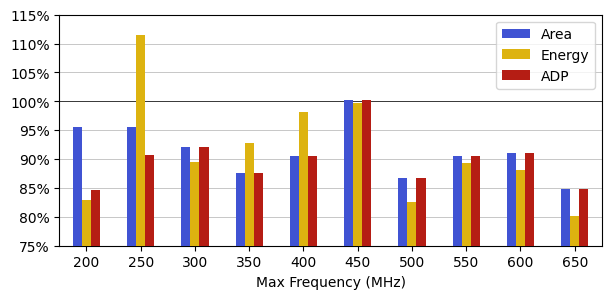

In [12]:
# colors = ['#1779ba', '#ffab00', '#36b37e', '#ff5630']
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']
# colors = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']

ylim = (75, 115)
ax = gain_df.plot.bar(
    rot=0,
    color=colors,
    zorder=3,
    figsize=(7, 3),
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_yticks(range(ylim[0], ylim[1]+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
plt.ylim(ylim)
plt.hlines(y=100, xmin=-1000, xmax=1000, colors='k', linewidth=0.5)
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.12, 1))
plt.legend(loc='best')
# plt.title('Hardware requirements of HUB Posit adder with respect to standard adder')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5, zorder=0)

plt.savefig('figs/adder_rate.pdf', bbox_inches="tight")
plt.show()

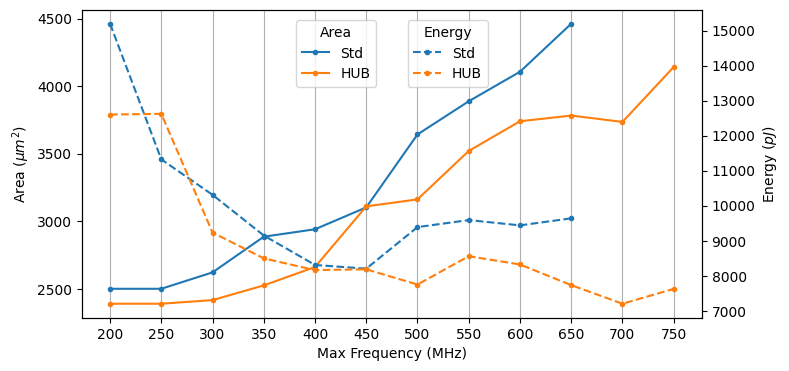

In [22]:
# Both area and energy

# fig = plt.figure()
ax = plt.subplot(111)

tab10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Area
ax1 = area_df.plot.line(
    y="Area",
    ax=ax,
    marker='.',
    rot=0,
    ylabel="Area ($\mu m^2$)",
    color=tab10,
)

# Energy
ax2 = energy_df.plot.line(
    y="Energy",
    # ax=ax1,
    ax=ax,
    secondary_y=True,
    rot=0,
    ylabel="Energy ($pJ$)",
    marker='.',
    linestyle='--',
    color=tab10,
)

# handles,labels = [],[]
# for ax in [ax,ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		print(l,h)
# 		handles.append(h)
# 		labels.append(l)

# Overwrite legend
# ax.legend()
# ax2.legend()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2

# ax.legend(lines, labels, loc='upper center', title='Designx')
ax1.legend(lines1,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.41, 0.99), title='Area')
ax2.legend(lines2,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.59, 0.99), title='Energy')
# plt.legend()


ax.set_xticks(range(200, area_df.index[-1]+1, 50))
ax.grid(True, axis="x")
ax.set_xlabel('Max Frequency (MHz)')

fig = ax.get_figure()
fig.set_size_inches(8, 4)
# fig.set_size_inches(5,3)

plt.savefig('figs/32_adder_area_energy.pdf', bbox_inches="tight")
plt.show()

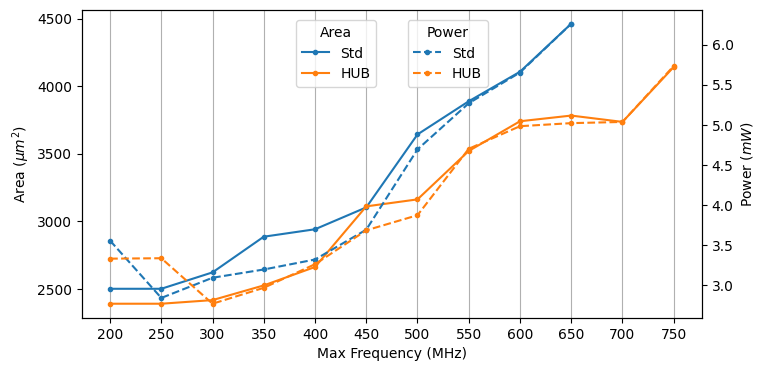

In [14]:
# Both area and energy

# fig = plt.figure()
ax = plt.subplot(111)

tab10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Area
ax1 = area_df.plot.line(
    y="Area",
    ax=ax,
    marker='.',
    rot=0,
    ylabel="Area ($\mu m^2$)",
    color=tab10,
)

# Power
ax2 = power_df.plot.line(
    y="Power",
    # ax=ax1,
    ax=ax,
    secondary_y=True,
    rot=0,
    ylabel="Power ($mW$)",
    marker='.',
    linestyle='--',
    color=tab10,
)

# handles,labels = [],[]
# for ax in [ax,ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		print(l,h)
# 		handles.append(h)
# 		labels.append(l)

# Overwrite legend
# ax.legend()
# ax2.legend()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2

# ax.legend(lines, labels, loc='upper center', title='Designx')
ax1.legend(lines1,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.41, 0.99), title='Area')
ax2.legend(lines2,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.59, 0.99), title='Power')
# plt.legend()


ax.set_xticks(range(200, area_df.index[-1]+1, 50))
ax.grid(True, axis="x")
ax.set_xlabel('Max Frequency (MHz)')

fig = ax.get_figure()
fig.set_size_inches(8, 4)

plt.savefig('figs/32_adder_area_power.pdf', bbox_inches="tight")
plt.show()

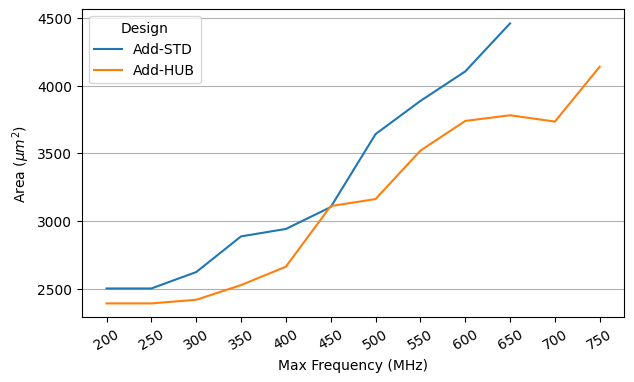

In [15]:
ax1 = area_df.plot.line(
    y="Area",
    rot=30,
    ylabel="Area ($\mu m^2$)",
    figsize=(7, 4)
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = area_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/adder_area.pdf', bbox_inches="tight")
plt.show()

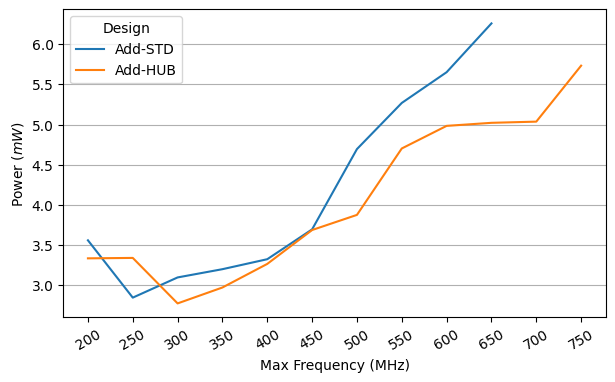

In [16]:
ax1 = power_df.plot.line(
    y="Power",
    rot=30,
    ylabel="Power ($mW$)",
    figsize=(7, 4)
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/adder_power.pdf', bbox_inches="tight")
plt.show()

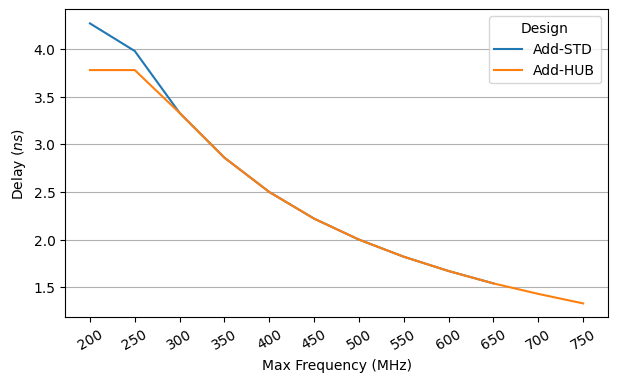

In [17]:
ax1 = delay_df.plot.line(
    y="Delay",
    rot=30,
    ylabel="Delay ($ns$)",
    figsize=(7, 4)
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/adder_delay.pdf', bbox_inches="tight")
plt.show()

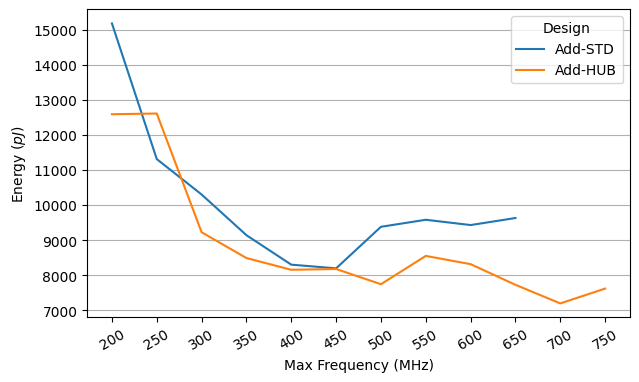

In [18]:
ax1 = energy_df.plot.line(
    y="Energy",
    rot=30,
    ylabel="Energy ($pJ$)",
    figsize=(7, 4)
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/adder_energy.pdf', bbox_inches="tight")
plt.show()

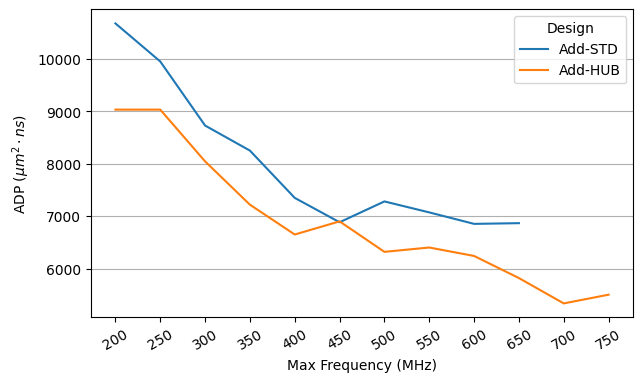

In [19]:
ax1 = ADP_df.plot.line(
    y="ADP",
    rot=30,
    ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7, 4)
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/adder_adp.pdf', bbox_inches="tight")
plt.show()

## Multiplication

In [3]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Multiplication_Original,32,0,MET,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Multiplication_Original,32,200,MET,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Multiplication_Original,32,250,MET,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Multiplication_Original,32,300,MET,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Multiplication_Original,32,350,MET,8145.446484,15.1352,2.85,43135.320,23214.522479


In [4]:
# Select certain bitwidth
mult_df = mult_df.query(f'Bits == {BITS}')
# mult_df

In [5]:
mult_df["Design"].replace("Multiplication_Original", "Mult-STD", inplace=True)
mult_df["Design"].replace("Multiplication_HUB", "Mult-HUB", inplace=True)
# mult_df.head()
mult_df.tail()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
83,Mult-HUB,32,1000,VIOLATED,12422.793778,24.5954,1.64,40336.456,20373.381796
84,Mult-HUB,32,1050,VIOLATED,12701.270586,24.9945,1.67,41740.815,21211.121879
85,Mult-HUB,32,1100,VIOLATED,12325.185784,24.4592,1.66,40602.272,20459.808401
86,Mult-HUB,32,1150,VIOLATED,12532.396983,25.2349,1.66,41889.934,20803.778992
87,Mult-HUB,32,1200,VIOLATED,13371.120165,27.6747,1.63,45109.761,21794.925869


In [6]:
# Remove non-constrained case
# mult_df = mult_df[mult_df["Freq"]!=0]
# mult_df = mult_df[mult_df["Delay"] <= round(1000/mult_df["Freq"], 2)]
mult_df = mult_df.query('Slack == "MET" & Freq != 0')

area_df = mult_df[["Area", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = mult_df[["ADP", "Design", "Freq"]].groupby(
    ["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design     Mult-STD     Mult-HUB
Freq                            
200     7544.980847  7833.100853
250     7544.980847  7833.100853
300     7555.329648  7833.100853
350     8145.446484  7844.155253
400     8322.316908  8056.540866

In [7]:
mult_df

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
1,Mult-STD,32,200,MET,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Mult-STD,32,250,MET,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Mult-STD,32,300,MET,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Mult-STD,32,350,MET,8145.446484,15.1352,2.85,43135.320,23214.522479
5,Mult-STD,32,400,MET,8322.316908,15.3901,2.50,38475.250,20805.792270
6,Mult-STD,32,450,MET,9046.968161,17.3583,2.22,38535.426,20084.269317
7,Mult-STD,32,500,MET,10436.059350,21.0143,2.00,42028.600,20872.118700
8,Mult-STD,32,550,MET,11840.438565,24.7435,1.82,45033.170,21549.598188
67,Mult-HUB,32,200,MET,7833.100853,15.3674,2.98,45794.852,23342.640542
68,Mult-HUB,32,250,MET,7833.100853,15.3674,2.98,45794.852,23342.640542


In [50]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Mult-HUB'] / area_df['Area']['Mult-STD']
power_gain = 100 * power_df['Power']['Mult-HUB'] / \
    power_df['Power']['Mult-STD']
delay_gain = 100 * delay_df['Delay']['Mult-HUB'] / \
    delay_df['Delay']['Mult-STD']
energy_gain = 100 * energy_df['Energy']['Mult-HUB'] / \
    energy_df['Energy']['Mult-STD']
adp_gain = 100 * ADP_df['ADP']['Mult-HUB'] / ADP_df['ADP']['Mult-STD']

energy_gain

Freq
200     88.140488
250     88.078253
300     98.951611
350     97.383583
400     98.426261
450    106.250036
500     96.113123
550     96.854123
600           NaN
dtype: float64

In [43]:
gain_df = pd.DataFrame([
    area_gain,
    # power_gain,
    # delay_gain,
    energy_gain,
    adp_gain
]
).drop([600], axis=1).T

gain_df.columns = [
    'Area',
    # 'Power',
    # 'Delay',
    'Energy',
    'ADP'
]
gain_df-100  # Negative means "HUB reduces <area|energy> by x.x%"

,Area,Energy,ADP
Freq,,,
200,10.032214,0.987962,0.862863
250,10.032214,0.987962,0.862863
300,10.032214,0.987962,0.862863
350,10.032214,0.951985,0.862863
400,10.032214,0.987962,0.862863
450,10.032214,0.987962,0.862863
500,10.032214,0.987962,0.862863
550,10.032214,0.987962,0.862863
650,10.032214,0.987962,0.862863


### Gain plot

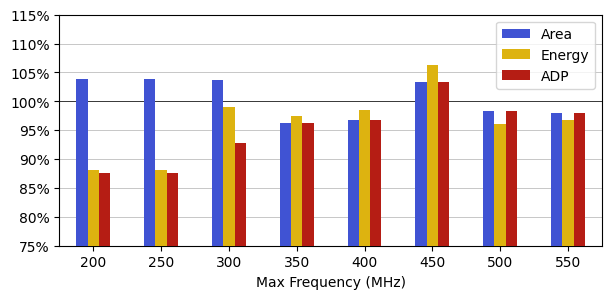

In [11]:
# colors = ['#1779ba', '#ffab00', '#36b37e', '#ff5630']
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']

ylim = (75, 115)
ax = gain_df.plot.bar(
    rot=0,
    color=colors,
    zorder=3,
    figsize=(7, 3),
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_yticks(range(ylim[0], ylim[1]+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
plt.ylim(ylim)
plt.hlines(y=100, xmin=-1000, xmax=1000, colors='k', linewidth=0.5)
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.12, 1))
plt.legend(loc='best')
# plt.title('Hardware requirements of HUB Posit multiplier with respect to standard multiplier')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5)

plt.savefig('figs/mult_rate.pdf', bbox_inches="tight")
plt.show()

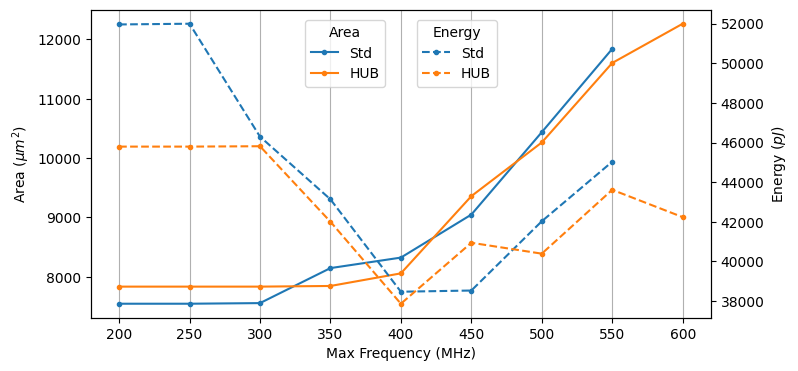

In [51]:
# Both area and energy

# fig = plt.figure()
ax = plt.subplot(111)

tab10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Area
ax1 = area_df.plot.line(
    y="Area",
    ax=ax,
    marker='.',
    rot=0,
    ylabel="Area ($\mu m^2$)",
    color=tab10,
)

# Energy
ax2 = energy_df.plot.line(
    y="Energy",
    # ax=ax1,
    ax=ax,
    secondary_y=True,
    rot=0,
    ylabel="Energy ($pJ$)",
    marker='.',
    linestyle='--',
    color=tab10,
)

# handles,labels = [],[]
# for ax in [ax,ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		print(l,h)
# 		handles.append(h)
# 		labels.append(l)

# Overwrite legend
# ax.legend()
# ax2.legend()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2

# ax.legend(lines, labels, loc='upper center', title='Designx')
ax1.legend(lines1,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.41, 0.99), title='Area')
ax2.legend(lines2,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.59, 0.99), title='Energy')
# plt.legend()


ax.set_xticks(range(200, area_df.index[-1]+1, 50))
ax.grid(True, axis="x")
ax.set_xlabel('Max Frequency (MHz)')

fig = ax.get_figure()
fig.set_size_inches(8, 4)

# plt.savefig('figs/32_mult_area_energy.pdf', bbox_inches="tight")
plt.show()

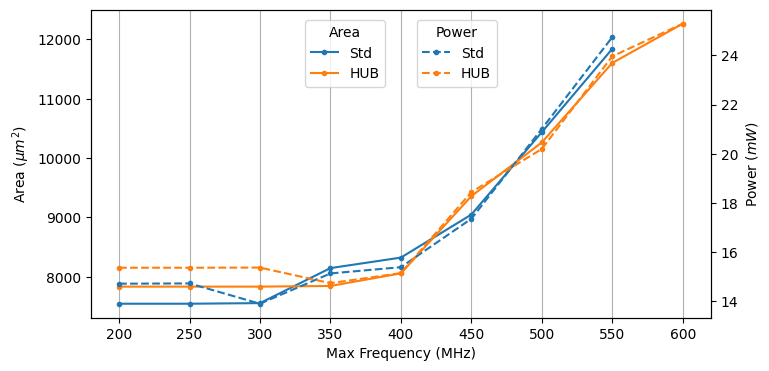

In [28]:
# Both area and energy

# fig = plt.figure()
ax = plt.subplot(111)

tab10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Area
ax1 = area_df.plot.line(
    y="Area",
    ax=ax,
    marker='.',
    rot=0,
    ylabel="Area ($\mu m^2$)",
    color=tab10,
)

# Power
ax2 = power_df.plot.line(
    y="Power",
    # ax=ax1,
    ax=ax,
    secondary_y=True,
    rot=0,
    ylabel="Power ($mW$)",
    marker='.',
    linestyle='--',
    color=tab10,
)

# handles,labels = [],[]
# for ax in [ax,ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		print(l,h)
# 		handles.append(h)
# 		labels.append(l)

# Overwrite legend
# ax.legend()
# ax2.legend()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# lines = lines1 + lines2
# labels = labels1 + labels2

# ax.legend(lines, labels, loc='upper center', title='Designx')
ax1.legend(lines1,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.41, 0.99), title='Area')
ax2.legend(lines2,  ['Std', 'HUB'], loc='upper center',
           bbox_to_anchor=(0.59, 0.99), title='Power')
# plt.legend()


ax.set_xticks(range(200, area_df.index[-1]+1, 50))
ax.grid(True, axis="x")
ax.set_xlabel('Max Frequency (MHz)')

fig = ax.get_figure()
fig.set_size_inches(8, 4)

plt.savefig('figs/32_mult_area_power.pdf', bbox_inches="tight")
plt.show()

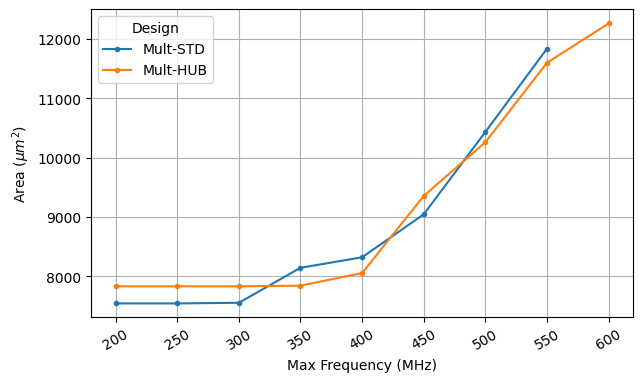

In [14]:
ax1 = area_df.plot.line(
    y="Area",
    rot=30,
    ylabel="Area ($\mu m^2$)",
    figsize=(7, 4),
    marker='.',
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = area_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True)
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/mult_area.pdf', bbox_inches="tight")
plt.show()

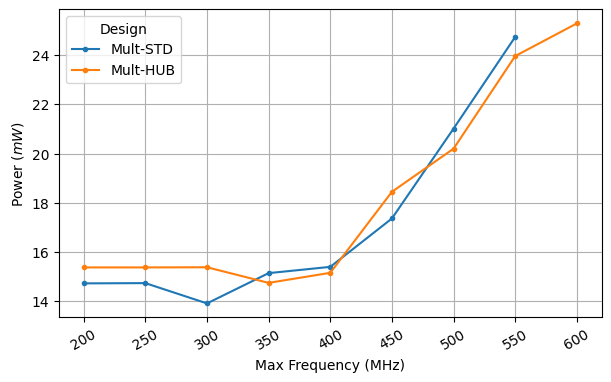

In [15]:
ax1 = power_df.plot.line(
    y="Power",
    rot=30,
    ylabel="Power ($mW$)",
    figsize=(7, 4),
    marker='.',
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True)
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/mult_power.pdf', bbox_inches="tight")
plt.show()

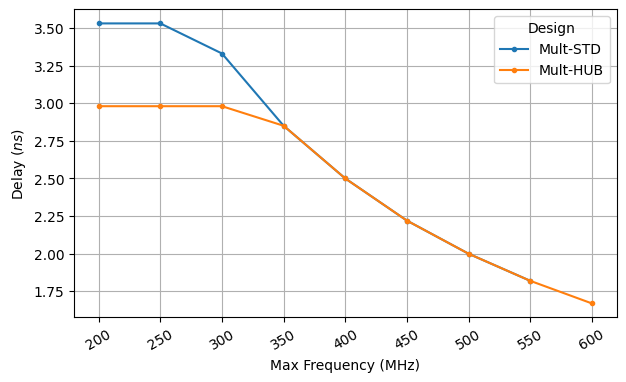

In [16]:
ax1 = delay_df.plot.line(
    y="Delay",
    rot=30,
    ylabel="Delay ($ns$)",
    figsize=(7, 4),
    marker='.',
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True)
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/mult_delay.pdf', bbox_inches="tight")
plt.show()

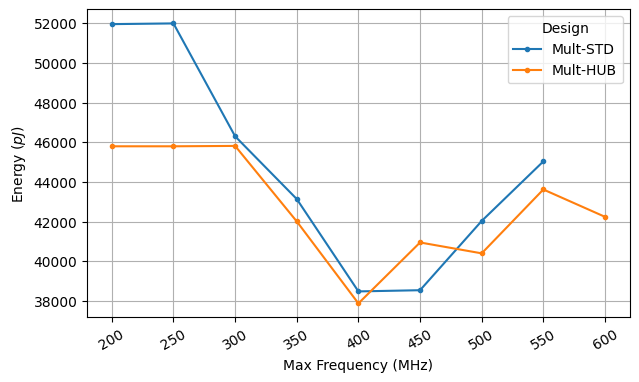

In [17]:
ax1 = energy_df.plot.line(
    y="Energy",
    rot=30,
    ylabel="Energy ($pJ$)",
    figsize=(7, 4),
    marker='.',
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True)
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
# plt.savefig('figs/mult_energy.pdf', bbox_inches="tight")
plt.show()

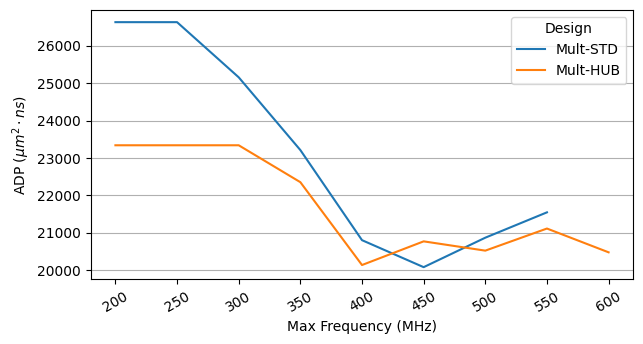

In [33]:
ax1 = ADP_df.plot.line(
    y="ADP",
    rot=30,
    ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7, 3.5)
)
ax1.set_xticks(range(200, area_df.index[-1]+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_adp.pdf', bbox_inches="tight")
plt.show()